In [1]:
#import the cifar10 dataset which contains images belonging to 10 classes :
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
%tensorflow_version 1.x
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

TensorFlow 1.x selected.


Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [2]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [3]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [4]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


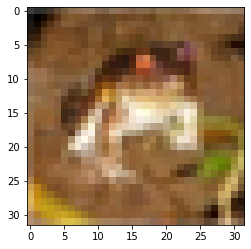

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

img=plt.imshow(x_train[0])

In [0]:
#convert the 10 classes of prediction into One-Hot Encoding

import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255


In [0]:
#import modules for building our Convolution Neural Network

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [0]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Dropout(0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(512, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=15, 
           validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/15





40000/40000 [==============================] - 23s 567us/step - loss: 1.6151 - acc: 0.4071 - val_loss: 1.2415 - val_acc: 0.5421
Epoch 2/15
40000/40000 [==============================] - 10s 241us/step - loss: 1.1857 - acc: 0.5765 - val_loss: 0.9889 - val_acc: 0.6441
Epoch 3/15
40000/40000 [==============================] - 10s 239us/step - loss: 1.0112 - acc: 0.6416 - val_loss: 0.8804 - val_acc: 0.6857
Epoch 4/15
40000/40000 [==============================] - 9s 234us/step - loss: 0.9055 - acc: 0.6809 - val_loss: 0.8326 - val_acc: 0.7036
Epoch 5/15
40000/40000 [==============================] - 9s 232us/step - loss: 0.8265 - acc: 0.7085 - val_loss: 0.7732 - val_acc: 0.7352
Epoch 6/15
40000/40000 [==============================] - 9s 232us/step - loss: 0.7704 - acc: 0.7308 - val_loss: 0.8044 - val_acc: 0.7200
Epoch 7/15
40000/

In [22]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 1s 79us/step


0.7628

In [0]:
model.save('my_cifar10_model.h5')

In [0]:
my_image = plt.imread("airplane.jpg")

In [0]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

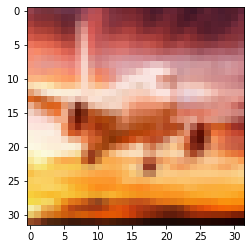

In [26]:
img = plt.imshow(my_image_resized)

In [0]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [28]:
probabilities

array([[0.8048648 , 0.01487803, 0.00478875, 0.12821919, 0.01416391,
        0.0096734 , 0.01011124, 0.00719476, 0.0009622 , 0.0051437 ]],
      dtype=float32)

In [0]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

In [0]:
my_image = plt.imread("airplane.jpg")

In [0]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

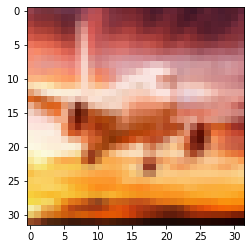

In [32]:
img = plt.imshow(my_image_resized)

In [0]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [34]:
probabilities

array([[0.8048648 , 0.01487803, 0.00478875, 0.12821919, 0.01416391,
        0.0096734 , 0.01011124, 0.00719476, 0.0009622 , 0.0051437 ]],
      dtype=float32)

In [37]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("MOST LIKELY CLASS:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("\n\nSecond most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("\n\nThird most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])

MOST LIKELY CLASS: airplane -- Probability: 0.8048648


Second most likely class: cat -- Probability: 0.12821919


Third most likely class: automobile -- Probability: 0.014878035
